In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#to get rid of import error of pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
# For reading stock data from The Investors Exchange (IEX)
import pandas_datareader as web
# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [ ]:
from gensim.models import KeyedVectors
# /content/drive/MyDrive/Trading/Reliance_embeddings.kv
# Setting the script name.
script_name = "Reliance"

# Load the word embeddings
word_vectors = KeyedVectors.load('/content/drive/MyDrive/Trading/'+ script_name + '_embeddings.kv', mmap='r')

# Getting the vector keys (or filenames in this case)
metadata = word_vectors.index_to_key

# Print the first 5 keys and their associated vectors
for key in metadata[:5]:  # Adjust the range as needed to print more or fewer keys
    print(f"Key: {key}")
    print(f"Vector: {word_vectors[key]}\n")

Key: reliance_1
Vector: [0.00000000e+00 0.00000000e+00 4.16077115e-03 0.00000000e+00
 6.06304407e-01 0.00000000e+00 4.13331809e-03 0.00000000e+00
 0.00000000e+00 5.66237932e-03 0.00000000e+00 0.00000000e+00
 1.27049908e-02 0.00000000e+00 0.00000000e+00 1.59788623e-01
 0.00000000e+00 1.38400078e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.45041423e-03
 2.30452009e-02 0.00000000e+00 8.23342577e-02 0.00000000e+00
 1.00663379e-01 0.00000000e+00 1.47060500e-02 7.20283191e-04
 3.97689193e-02 0.00000000e+00 2.01767147e-01 0.00000000e+00
 2.00435370e-02 2.75550671e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.48734379e-01 0.00000000e+00
 1.39904320e-01 5.35318911e-01 9.57547594e-03 1.54781586e-03
 3.55014764e-03 5.44607520e-01 2.63779998e-01 0.00000000e+00
 1.48544076e-03 0.00000000e+00 4.72142436e-02 9.41457093e-01
 3.91822517e-01 9.51567572e-03 8.25552046e-01 6.12963259e-01
 0.00000000e+00 0.00000000e+00 2.76277168e-03 4.92841611e-03


In [ ]:
keys = word_vectors.index_to_key
vectors = np.array([word_vectors[key] for key in keys])

#Analysis

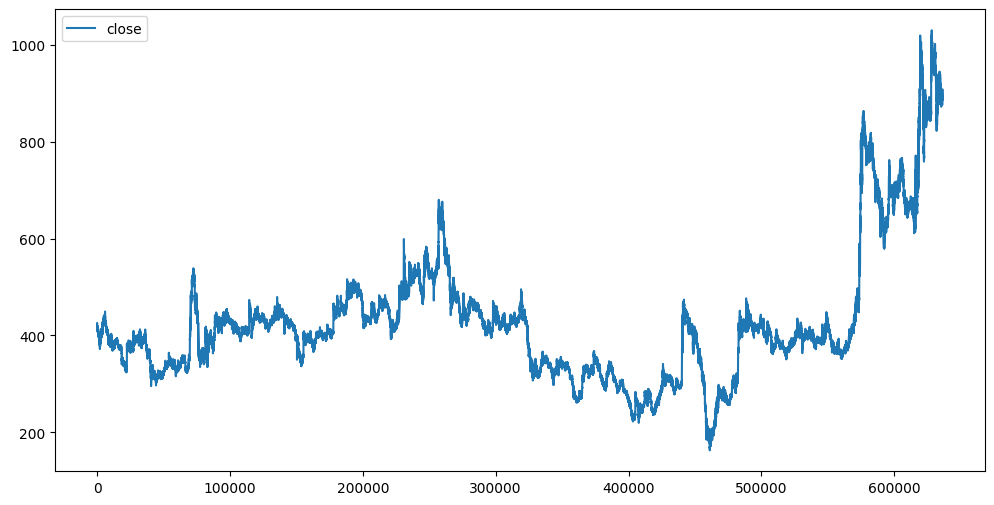

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Trading/Reliance.csv')
df['close'].plot(legend=True, figsize = (12, 6))
plt.show()

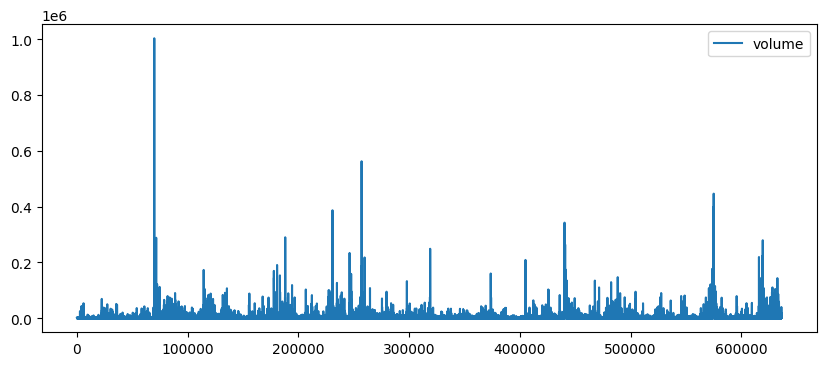

In [37]:
df['volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [38]:
ma_day = [20]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['close'],ma).mean()

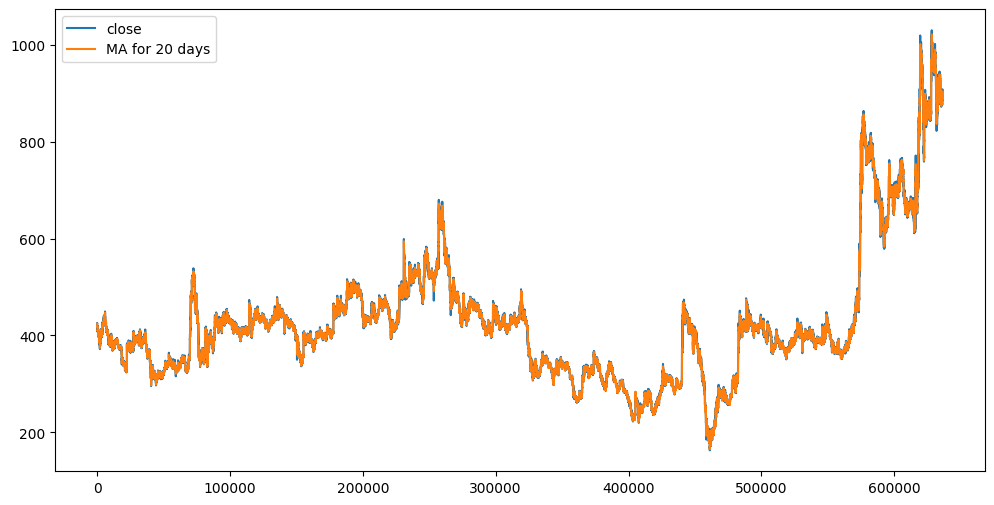

In [39]:
df[['close','MA for 20 days']].plot(subplots=False,figsize=(12,6))
plt.show()
#NOT THAT MUCH LOW

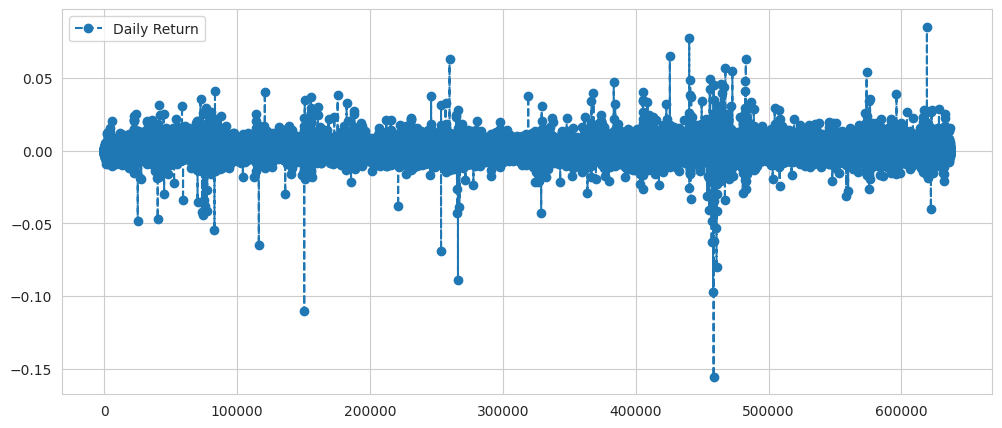

In [ ]:
df['Daily Return'] = df['close'].pct_change()
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

<ipython-input-13-a2bd6225f932>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Daily Return'].dropna(),bins=100,color='blue')


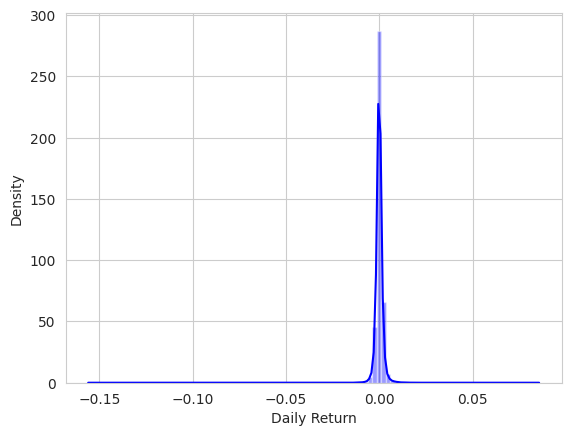

In [ ]:
sns.distplot(df['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

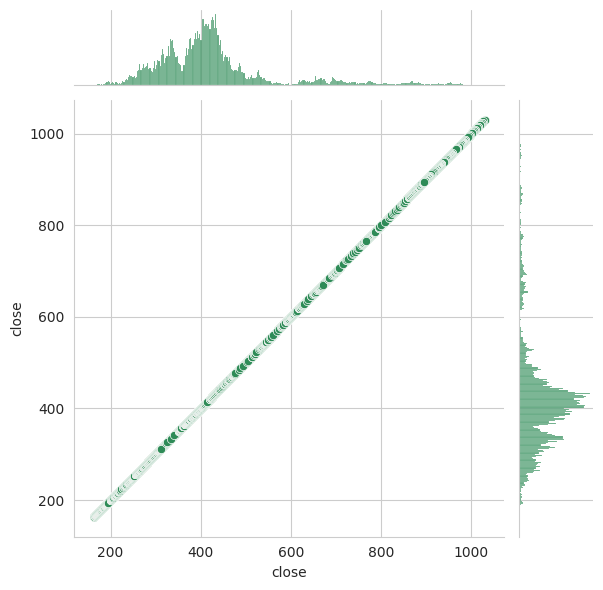

In [ ]:
sns.jointplot(x='close' , y='close',data=df,kind='scatter' ,color='seagreen')
plt.show()

#More analysis and using a XGB

In [ ]:
from gensim.models import KeyedVectors
# /content/drive/MyDrive/Trading/Reliance_embeddings.kv
script_name = "Reliance"

# Load the word embeddings
word_vectors = KeyedVectors.load('/content/drive/MyDrive/Trading/'+ script_name + '_embeddings.kv', mmap='r')

metadata = word_vectors.index_to_key

## Print the first 5 keys and their associated vectors
# for key in metadata[:5]:
#     print(f"Key: {key}")
#     print(f"Vector: {word_vectors[key]}\n")

In [ ]:
for key in metadata[:5]:
    print(f"Key: {key}")
    print(f"Vector: {word_vectors[key]}\n")

Key: reliance_1
Vector: [0.00000000e+00 0.00000000e+00 4.16077115e-03 0.00000000e+00
 6.06304407e-01 0.00000000e+00 4.13331809e-03 0.00000000e+00
 0.00000000e+00 5.66237932e-03 0.00000000e+00 0.00000000e+00
 1.27049908e-02 0.00000000e+00 0.00000000e+00 1.59788623e-01
 0.00000000e+00 1.38400078e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.45041423e-03
 2.30452009e-02 0.00000000e+00 8.23342577e-02 0.00000000e+00
 1.00663379e-01 0.00000000e+00 1.47060500e-02 7.20283191e-04
 3.97689193e-02 0.00000000e+00 2.01767147e-01 0.00000000e+00
 2.00435370e-02 2.75550671e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.48734379e-01 0.00000000e+00
 1.39904320e-01 5.35318911e-01 9.57547594e-03 1.54781586e-03
 3.55014764e-03 5.44607520e-01 2.63779998e-01 0.00000000e+00
 1.48544076e-03 0.00000000e+00 4.72142436e-02 9.41457093e-01
 3.91822517e-01 9.51567572e-03 8.25552046e-01 6.12963259e-01
 0.00000000e+00 0.00000000e+00 2.76277168e-03 4.92841611e-03


In [2]:
import pandas as pd
from gensim.models import KeyedVectors

reliance_data = pd.read_csv('/content/drive/MyDrive/Trading/Reliance.csv',parse_dates=['date'])
word_vectors = KeyedVectors.load('/content/drive/MyDrive/Trading/Reliance_embeddings.kv')
print(reliance_data.head())

                       date    open    high     low   close  volume
0 2015-03-20 09:15:00+05:30  425.00  426.25  425.00  425.00    1186
1 2015-03-20 09:16:00+05:30  424.50  425.00  424.20  425.00     768
2 2015-03-20 09:17:00+05:30  425.00  425.90  425.00  425.15     425
3 2015-03-20 09:18:00+05:30  425.90  425.95  425.85  425.85     659
4 2015-03-20 09:19:00+05:30  426.25  426.40  425.15  425.15    1548


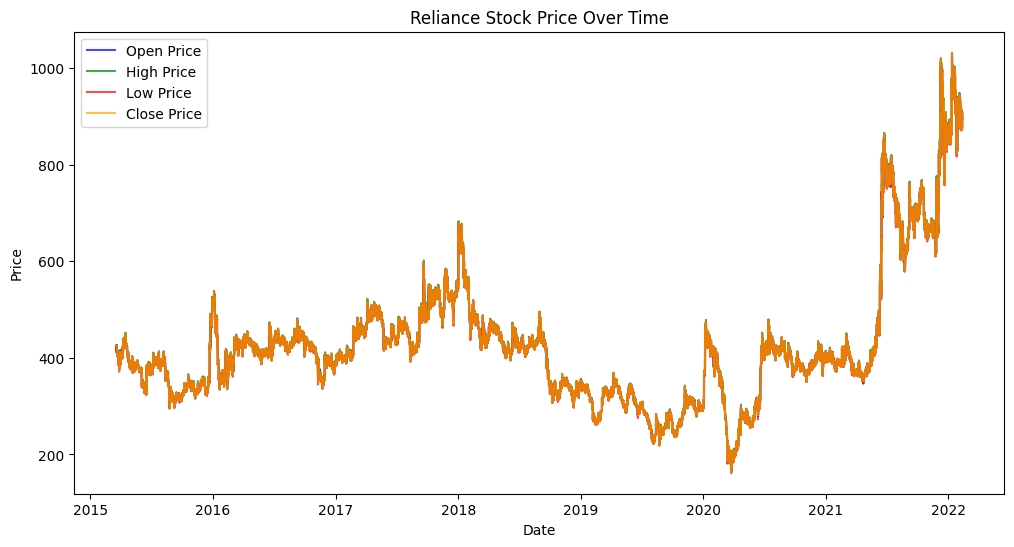

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reliance_data.set_index('date', inplace=True)


#Visualize Open, High, Low, Close Prices over time
plt.figure(figsize=(12, 6))
plt.plot(reliance_data.index, reliance_data['open'], label='Open Price', color='blue', alpha=0.7)
plt.plot(reliance_data.index, reliance_data['high'], label='High Price', color='green', alpha=0.7)
plt.plot(reliance_data.index, reliance_data['low'], label='Low Price', color='red', alpha=0.7)
plt.plot(reliance_data.index, reliance_data['close'], label='Close Price', color='orange', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance Stock Price Over Time')
plt.legend()
plt.show()

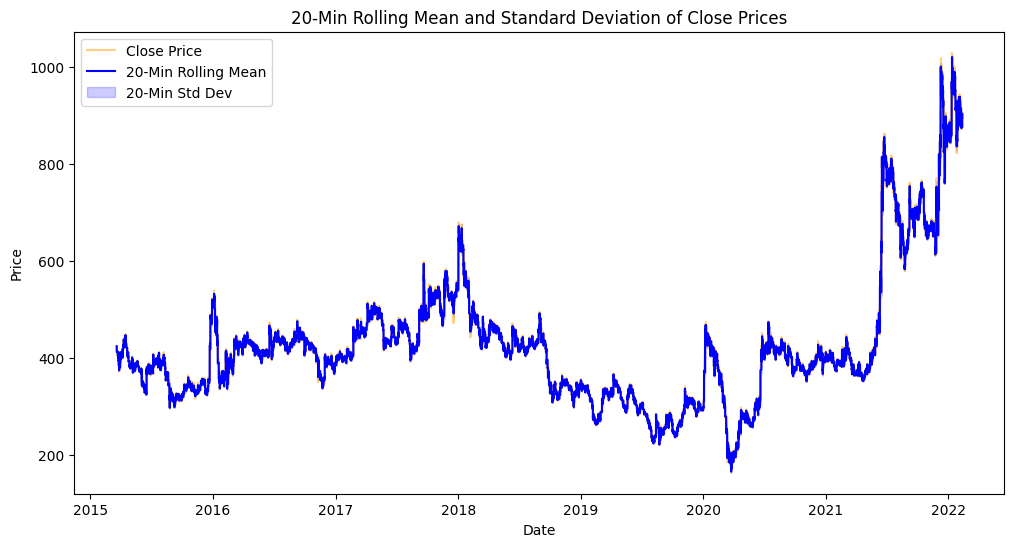

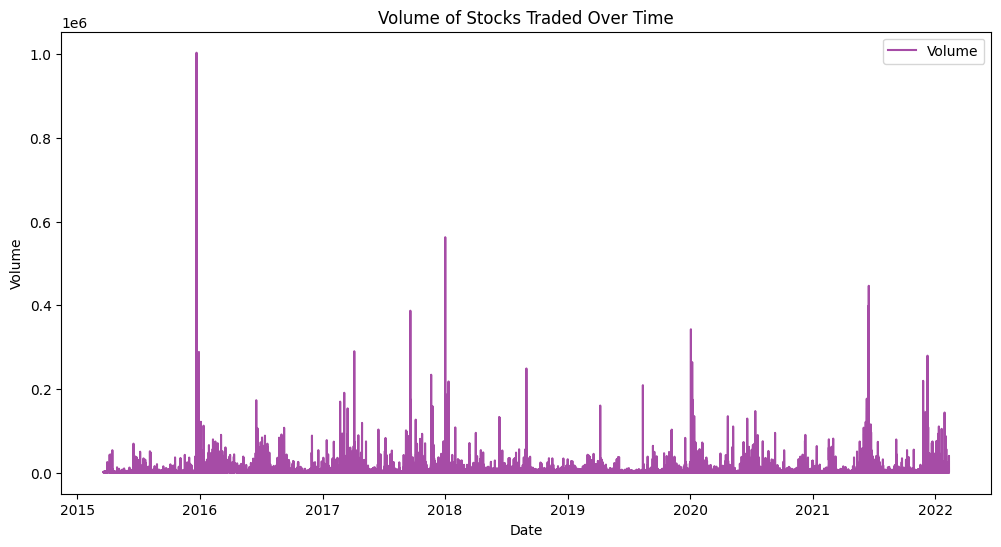

In [4]:
#Rolling Mean and Standard Deviation (20-minute window)
reliance_data['rolling_mean'] = reliance_data['close'].rolling(window=20).mean()
reliance_data['rolling_std'] = reliance_data['close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(reliance_data.index, reliance_data['close'], label='Close Price', color='orange', alpha=0.5)
plt.plot(reliance_data.index, reliance_data['rolling_mean'], label='20-Min Rolling Mean', color='blue')
plt.fill_between(reliance_data.index,
                 reliance_data['rolling_mean'] - reliance_data['rolling_std'],
                 reliance_data['rolling_mean'] + reliance_data['rolling_std'],
                 color='blue', alpha=0.2, label='20-Min Std Dev')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('20-Min Rolling Mean and Standard Deviation of Close Prices')
plt.legend()
plt.show()

#Volume vs Time Plot
plt.figure(figsize=(12, 6))
plt.plot(reliance_data.index, reliance_data['volume'], label='Volume', color='purple', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Stocks Traded Over Time')
plt.legend()
plt.show()

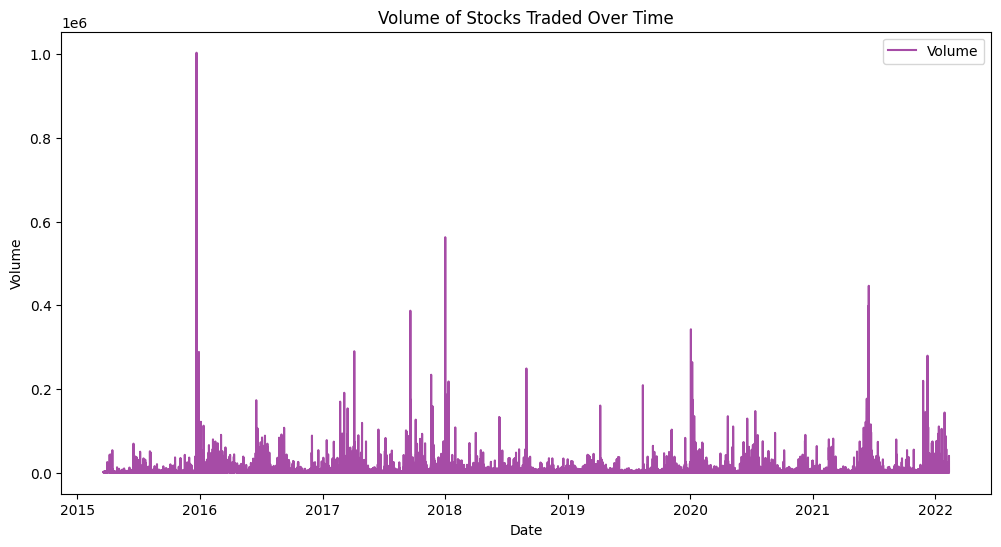

In [5]:
#Volume vs Time Plot
plt.figure(figsize=(12, 6))
plt.plot(reliance_data.index, reliance_data['volume'], label='Volume', color='purple', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Stocks Traded Over Time')
plt.legend()
plt.show()

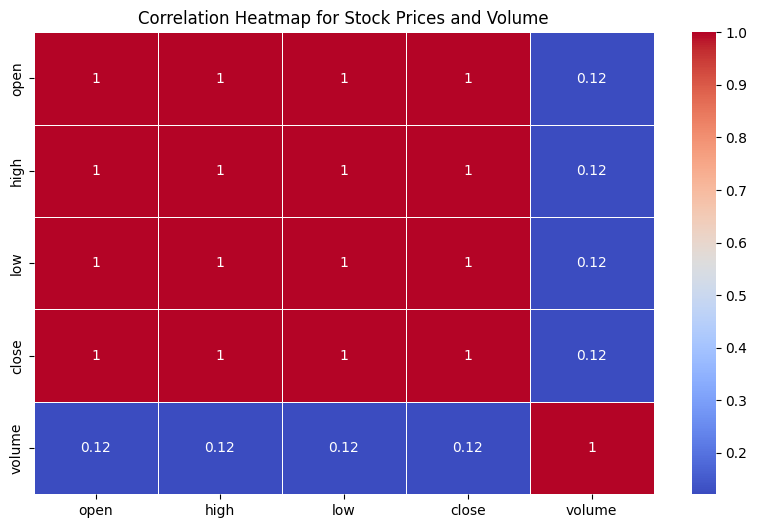

In [6]:
plt.figure(figsize=(10, 6))
corr = reliance_data[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Stock Prices and Volume')
plt.show()
# INTRESTING

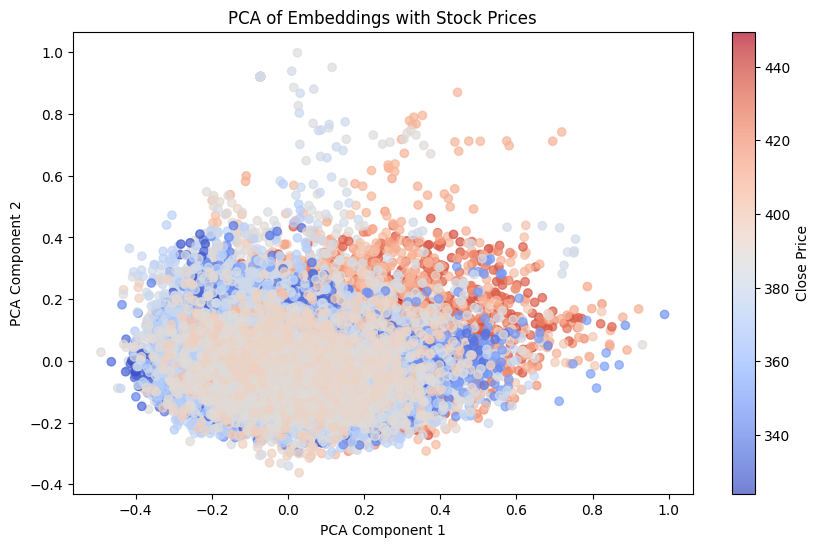

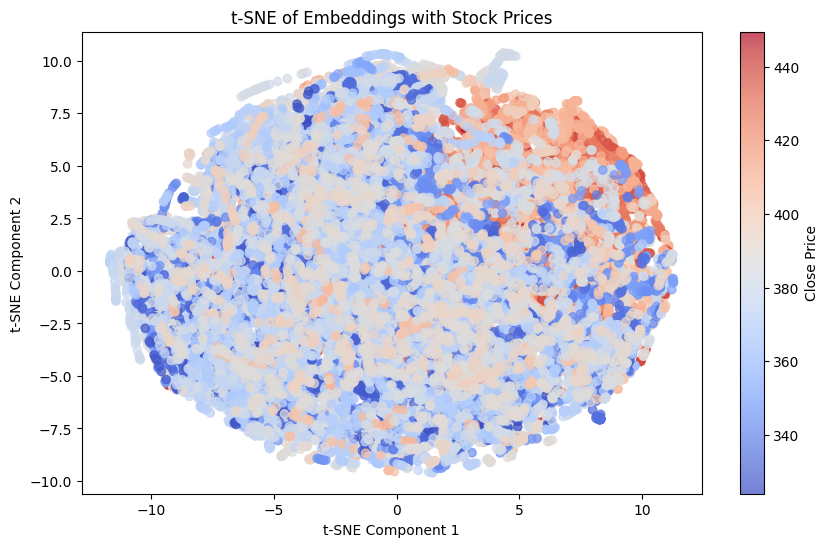

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

reliance_data2 = pd.read_csv('/content/drive/MyDrive/Trading/Reliance.csv')
def get_embedding(row, word_vectors):
    try:
        return word_vectors[f"reliance_{row.name+1}"]
    except KeyError:
        return None


reliance_data2['embedding']=reliance_data2.apply(lambda row: get_embedding(row, word_vectors), axis=1)
reliance_data2 =reliance_data2.dropna(subset=['embedding'])

embeddings = pd.DataFrame(reliance_data2['embedding'].to_list(), index=reliance_data2.index)

#PCA DIM RED
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings.dropna())
# SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=reliance_data2['close'].iloc[:len(pca_result)], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Close Price')
plt.title('PCA of Embeddings with Stock Prices')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#TNSE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(embeddings.dropna())

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=reliance_data2['close'].iloc[:len(tsne_result)], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Close Price')
plt.title('t-SNE of Embeddings with Stock Prices')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [13]:
# Define the percentage threshold for Buy/Sell signals
import pandas as pd
from gensim.models import KeyedVectors

# Load reliance.csv data
reliance_data = pd.read_csv('/content/drive/MyDrive/Trading/Reliance.csv')

# Load embeddings data using Gensim
word_vectors = KeyedVectors.load('/content/drive/MyDrive/Trading/Reliance_embeddings.kv')

# Display first rows of reliance_data for reference
print(reliance_data.head())

# Match reliance_data with vector embeddings based on time window
# For simplicity, let's assume 'date' column in reliance.csv can match keys in reliance_embeddings.kv
# e.g., date == '2015-03-20 09:15:00' corresponds to 'reliance_1', etc.
# Sample logic to combine data

def get_embedding(row, word_vectors):
    try:
        # Access embedding using dictionary-style lookup
        return word_vectors[f"reliance_{row.name+1}"]
    except KeyError:
        # Return None if the key is not found
        return None


reliance_data['embedding'] = reliance_data.apply(lambda row: get_embedding(row, word_vectors), axis=1)
reliance_data = reliance_data.dropna(subset=['embedding'])
threshold = 0.005

def create_labels(data, future_window=20):
    labels = []
    for i in range(len(data) - future_window):
        future_price = data['close'].iloc[i + future_window]
        current_price = data['close'].iloc[i]
        price_change = (future_price - current_price) / current_price

        if price_change > threshold:
            labels.append(1)  # Buy
        elif price_change < -threshold:
            labels.append(0)  # Sell
        else:
            labels.append(2)  # Hold

    # For the last 'future_window' rows, we can't predict future price, so drop them
    labels += [0] * future_window
    return labels

# Apply labeling to the data
reliance_data['label'] = create_labels(reliance_data)


                        date    open    high     low   close  volume
0  2015-03-20 09:15:00+05:30  425.00  426.25  425.00  425.00    1186
1  2015-03-20 09:16:00+05:30  424.50  425.00  424.20  425.00     768
2  2015-03-20 09:17:00+05:30  425.00  425.90  425.00  425.15     425
3  2015-03-20 09:18:00+05:30  425.90  425.95  425.85  425.85     659
4  2015-03-20 09:19:00+05:30  426.25  426.40  425.15  425.15    1548


In [14]:
reliance_data['label'].unique()

array([2, 0, 1])

In [15]:
from sklearn.model_selection import train_test_split
X=reliance_data[['open', 'high', 'low', 'close', 'volume', 'embedding']]
X = pd.concat([X.drop(columns=['embedding']), pd.DataFrame(X['embedding'].to_list())], axis=1)  # Flatten embeddings
y = reliance_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 72.45%


VERT SIMPLE STARRTGY USING XBG.

In [18]:
initial_balance=100000
balance = initial_balance
position = 0
trade_size =100

for i in range(len(y_test)):
    action = y_pred[i]
    current_price = X_test['close'].iloc[i]

    if action == 1:  # Buy
        if position == 0:
            position = trade_size
            balance -= current_price * trade_size
            print(f"Buying at {current_price}")

    elif action == -1:  # Sell
        if position > 0:
            balance += current_price * trade_size
            position = 0
            print(f"Selling at {current_price}")

final_balance = balance + position * X_test['close'].iloc[-1]
print(f"Final Balance: {final_balance}")
print(f"Profit/Loss: {final_balance - initial_balance}")

Buying at 327.25
Final Balance: 106215.0
Profit/Loss: 6215.0


#extracting a feature and using a RFC

In [20]:
import numpy as np
keys = list(word_vectors.key_to_index.keys())
vector_sample = [word_vectors[keys[i]] for i in range(min(5, len(keys)))]
vector_array = np.array(vector_sample)
print(f"Vector Dimensions: {vector_array.shape[1]}")
print(f"Vector Sample:\n{vector_array[:5]}")
print(f"Vector Statistics - Mean: {vector_array.mean()}, Std: {vector_array.std()}")

Vector Dimensions: 512
Vector Sample:
[[0.0000000e+00 0.0000000e+00 4.1607711e-03 ... 0.0000000e+00
  9.0600914e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 8.9364974e-03 ... 8.9036144e-04
  9.1082257e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 5.5472553e-03 ... 3.2305289e-03
  9.0797734e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.6872973e-03 ... 1.6189446e-03
  8.9116311e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 3.0006925e-03 ... 2.4045459e-03
  8.9179081e-01 0.0000000e+00]]
Vector Statistics - Mean: 0.13132637739181519, Std: 0.49805784225463867


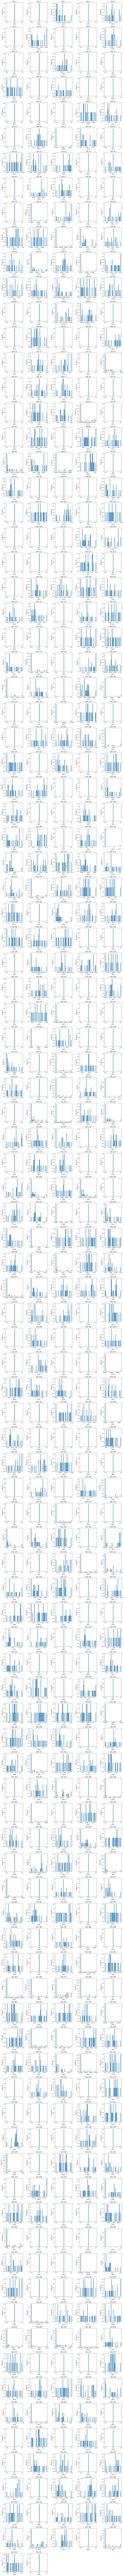

In [22]:
import matplotlib.pyplot as plt
import numpy as np

vector_sample= [word_vectors[keys[i]] for i in range(min(20, len(keys)))]
vector_array= np.array(vector_sample)
n_dims =vector_array.shape[1]
n_cols =5
n_rows =(n_dims+n_cols-1)//n_cols  #FORMULA FOR NO. OF ROWS NEEDED

plt.figure(figsize=(n_cols*3,n_rows * 3))
for i in range(n_dims):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(vector_array[:, i], bins=30, alpha=0.7)
    plt.title(f"Dim {i}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


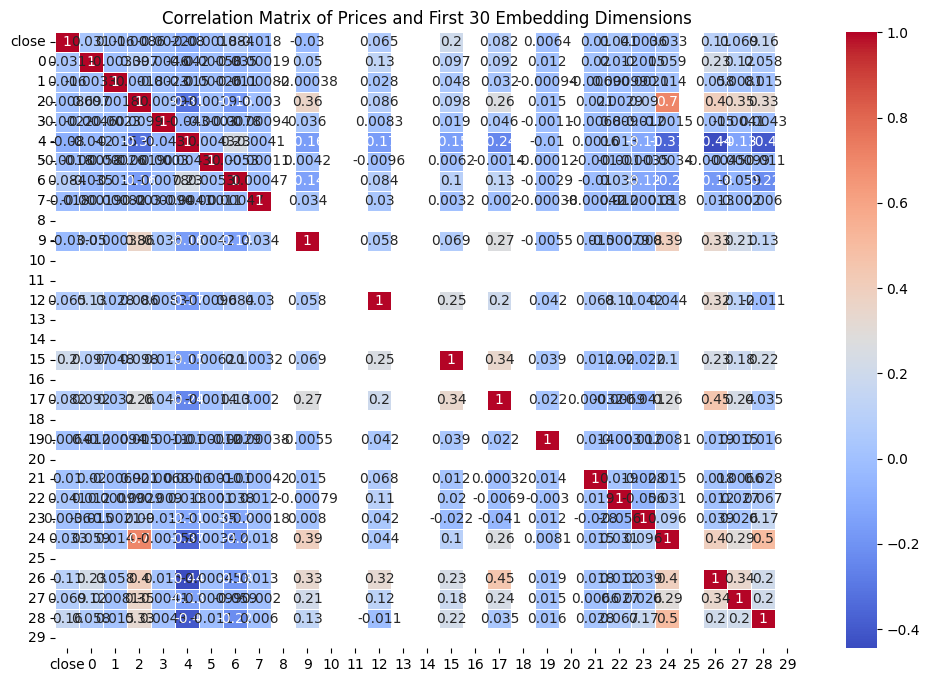

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Taking only 30 dimensions as 512 is to big to plot
embedding_dimensions = 30
if 'embedding' in reliance_data.columns:
    embedding_df = pd.DataFrame(reliance_data['embedding'].tolist(), index=reliance_data.index)
    embedding_df_30 = embedding_df.iloc[:, :embedding_dimensions]
    combined_df = pd.concat([reliance_data[['close']], embedding_df_30], axis=1)
    correlation_matrix = combined_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Prices and First 30 Embedding Dimensions')
    plt.show()
else:
    print("Embedding column not found in DataFrame.")


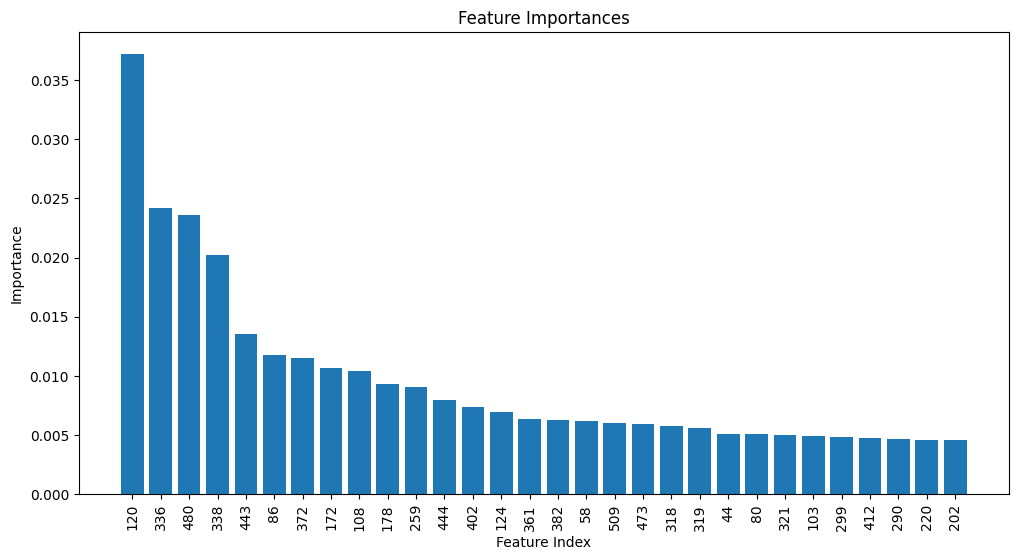

In [32]:
#finding the important features.
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

embedding_df =pd.DataFrame(reliance_data['embedding'].tolist(),index=reliance_data.index)
combined_df = pd.concat([reliance_data[['close']], embedding_df], axis=1)
X=embedding_df.fillna(0)  # Handle missing values
y=reliance_data['close'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=XGBRegressor()
model.fit(X_train, y_train)

top_indices = indices[:top_n]
top_importances = importances[top_indices]
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]
top_n=30
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_indices, rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

##Taking all the features and using a RFC

In [30]:
reliance_data = pd.read_csv('/content/drive/MyDrive/Trading/Reliance.csv')
word_vectors = KeyedVectors.load('/content/drive/MyDrive/Trading/Reliance_embeddings.kv')

def get_embedding(row, word_vectors):
    try:
        return word_vectors[f"reliance_{row.name+1}"]
    except KeyError:
        return None

reliance_data['embedding'] = reliance_data.apply(lambda row: get_embedding(row, word_vectors), axis=1)
reliance_data = reliance_data.dropna(subset=['embedding'])
embedding_df = pd.DataFrame(reliance_data['embedding'].tolist())
embedding_df['mean'] = embedding_df.mean(axis=1)
embedding_df['std'] = embedding_df.std(axis=1)
combined_df = pd.concat([reliance_data[['close']], embedding_df], axis=1)
combined_df['future_close'] = combined_df['close'].shift(-1)
combined_df['return'] = (combined_df['future_close'] - combined_df['close']) / combined_df['close']
combined_df['signal'] = np.where(combined_df['return'] > 0.01, 1, 0)  # Buy if return > 1%, else 0
features = combined_df[['mean', 'std']]
target = combined_df['signal']
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)
X_train, X_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.3, random_state=42)
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#SiGNAL PREDICTION
combined_df['predicted_signal'] = model.predict(features)
def backtest_strategy(df,transaction_cost=0.01,stop_loss=0.02,take_profit=0.03):
    position = None
    profit = 0
    for i in range(1, len(df)):
        if df['predicted_signal'].iloc[i-1] == 1 and position is None:
            position = df['close'].iloc[i]
        elif df['predicted_signal'].iloc[i-1] == 0 and position is not None:
            if df['close'].iloc[i] < position * (1 - stop_loss):
                profit += df['close'].iloc[i] - position - transaction_cost
            elif df['close'].iloc[i] > position * (1 + take_profit):
                profit += df['close'].iloc[i] - position - transaction_cost
            position = None
    return profit
profit = backtest_strategy(combined_df)
print(f"Strategy Profit: {profit}")
print("Model Evaluation:")
print(classification_report(target_resampled, model.predict(features_resampled)))
print("Confusion Matrix:")
print(confusion_matrix(target_resampled, model.predict(features_resampled)))


Strategy Profit: 13.939999999999989
Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     29946
           1       0.97      0.98      0.98     29946

    accuracy                           0.97     59892
   macro avg       0.98      0.97      0.97     59892
weighted avg       0.98      0.97      0.97     59892

Confusion Matrix:
[[28922  1024]
 [  482 29464]]


##Taking only the important features

**this is resulting bad but i think with more give time and analying it will give best results. PS I did not get much time**

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      3801
           1       0.36      0.04      0.07      2195

    accuracy                           0.62      5996
   macro avg       0.50      0.50      0.42      5996
weighted avg       0.53      0.62      0.51      5996

Strategy Profit: -532.7499999999951


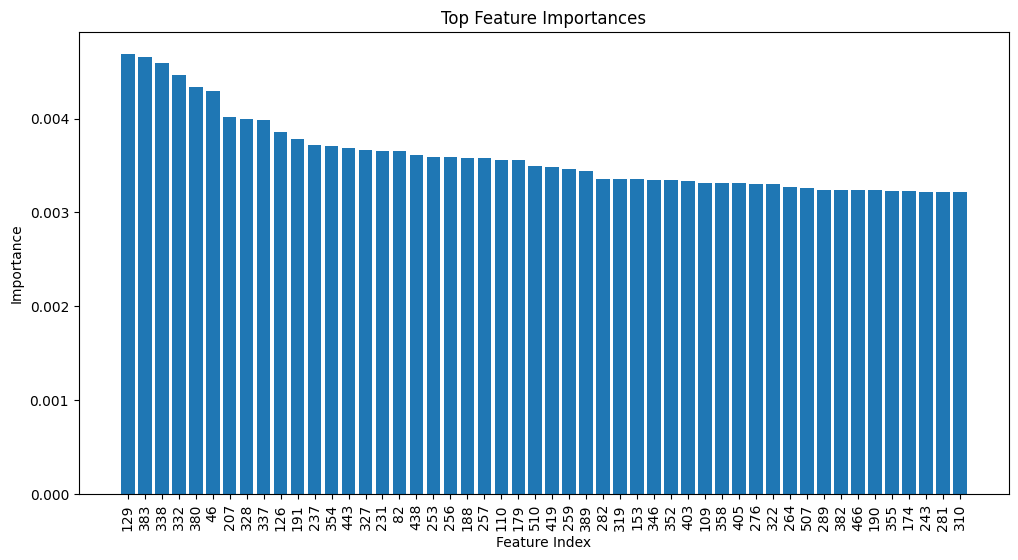

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors

reliance_data = pd.read_csv('/content/drive/MyDrive/Trading/Reliance.csv')
word_vectors = KeyedVectors.load('/content/drive/MyDrive/Trading/Reliance_embeddings.kv')

def get_embedding(row, word_vectors):
    try:
        return word_vectors[f"reliance_{row.name+1}"]
    except KeyError:
        return None

reliance_data['embedding'] = reliance_data.apply(lambda row: get_embedding(row, word_vectors), axis=1)
reliance_data = reliance_data.dropna(subset=['embedding'])
embedding_df = pd.DataFrame(reliance_data['embedding'].tolist(), index=reliance_data.index)
combined_df = pd.concat([reliance_data[['date', 'close']], embedding_df], axis=1)

#feTURE addition
combined_df['mean'] = combined_df['close'].rolling(window=20).mean()
combined_df['std'] = combined_df['close'].rolling(window=20).std()
combined_df['bollinger_upper'] = combined_df['mean'] + (combined_df['std'] * 2)
combined_df['bollinger_lower'] = combined_df['mean'] - (combined_df['std'] * 2)
combined_df['rolling_mean'] = combined_df['close'].rolling(window=20).mean()
combined_df['rolling_std'] = combined_df['close'].rolling(window=20).std()

X = combined_df[['mean', 'bollinger_upper', 'bollinger_lower', 'rolling_mean', 'rolling_std'] + list(range(embedding_df.shape[1]))]
y = (combined_df['close'].shift(-1) > combined_df['close']).astype(int)  # Binary target: 1 if price goes up, else 0


X = X.fillna(0)
y = y.dropna()
X = X.loc[y.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 50
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = [X.columns[i] for i in top_indices]

X_top_features = X[top_features]
X_train_top = X_top_features.loc[X_train.index]
X_test_top = X_top_features.loc[X_test.index]
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train_top, y_train)

y_pred = rfc_model.predict(X_test_top)
print(classification_report(y_test, y_pred))

def backtest_strategy(df, predictions):
    position = None
    profit = 0
    for i in range(1, len(df)):
        if predictions[i-1] == 1 and position is None:
            position = df['close'].iloc[i]
        elif predictions[i-1] == 0 and position is not None:
            profit += df['close'].iloc[i] - position
            position = None
    return profit
X_all_top_features = X_top_features.loc[y.index]
y_all = y
predictions = rfc_model.predict(X_all_top_features)
profit = backtest_strategy(combined_df, predictions)
print(f"Strategy Profit: {profit}")
plt.figure(figsize=(12, 6))
plt.title('Top Feature Importances')
plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_indices, rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()
